In [20]:
import konlpy
from konlpy.tag import Twitter
import warnings
import pandas as pd
import numpy as np
import re
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import urllib
import requests
from bs4 import BeautifulSoup
# warnings.filterwarnings('ignore')

# [3월 18일]
---

## # 네이버 뉴스 4개 카테고리 분석
---
- 뉴스기사 카테고리별 저장(파일 도는 DB)
- 텍스트 전처리 및 피처 벡터화
- 모델링 및 평가(성능개선 포함)
- 참조 : https://wikidocs.net/74715

//*[@id="section_body"]/ul[1]/li[1]/dl/dt[2]
//*[@id="section_body"]/ul[1]/li[1]/dl/dt[2]/a
//*[@id="section_body"]/ul[1]/li[1]/dl/dt[2]/a
//*[@id="section_body"]/ul[1]/li[2]/dl/dt[2]/a

In [ ]:
#section_body > ul.type06_headline > li:nth-child(2) > dl > dt:nth-child(2) > a

In [38]:
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

print(soup.prettify())

<!DOCTYPE HTML>
<html lang="ko">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta contents="always" name="referrer"/>
  <meta content="600" http-equiv="refresh">
   <meta content="width=1106" name="viewport">
    <meta content="정치 : 네이버 뉴스" property="og:title"/>
    <meta content="website" property="og:type"/>
    <meta content="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=100" property="og:url"/>
    <meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
     <meta content="국회, 행정, 국방, 외교 등 정치 분야 뉴스 제공" property="og:description"/>
     <meta content="네이버" property="og:article:author">
      <meta content="summary" name="twitter:card"/>
      <meta content="정치 : 네이버 뉴스" name="twitter:title"/>
      <meta content="네이버 뉴스" name="twitter:site"/>
      <meta content="네이버 뉴스" name="twitter:creator"/>
      <meta content="https://ssl.pstatic.net/static.n

<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/
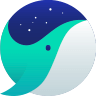
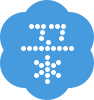

In [45]:
url = 'https://naver.com'
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

print(soup.prettify())

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))),
    ('lr_clf', LogisticRegression(C = 10, n_jobs = -1))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_proba = pipeline.predict_proba(X_test['review'])[:, 1]

print('정확도 :', accuracy_score(y_test, pred))
print('auc :', roc_auc_score(y_test, pred_proba))